## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [158]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?




Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


/tmp/ipython-input-2943460681.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


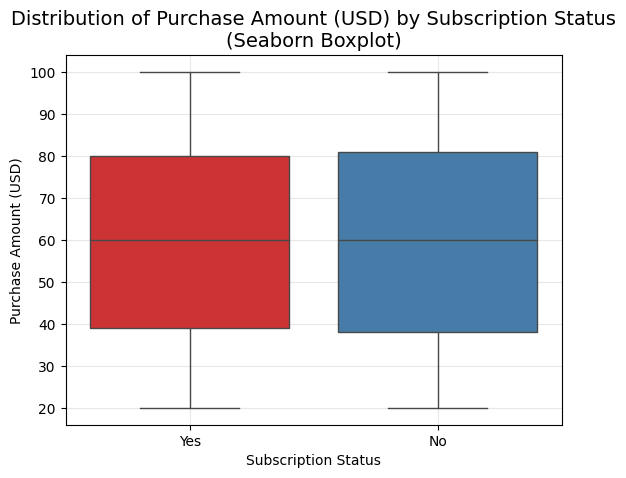

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)


# seaborn
sns.boxplot(
    data=df,
    x='Subscription Status',
    y='Purchase Amount (USD)',
    palette='Set1'
)

plt.title('Distribution of Purchase Amount (USD) by Subscription Status\n(Seaborn Boxplot)', fontsize=14)
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.grid(True, alpha=0.3)
plt.show()


##---> No outliers founded

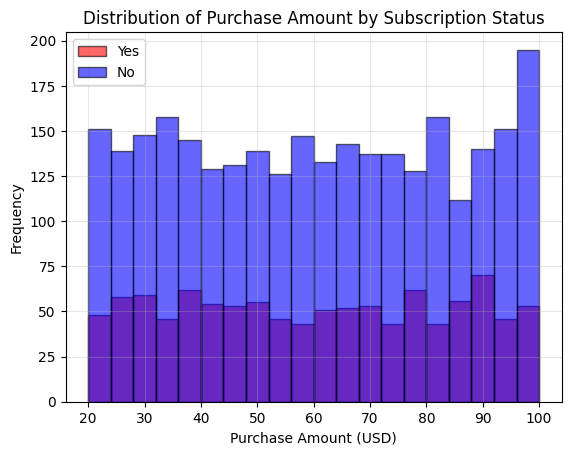

In [160]:
plt.hist(df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'],
         bins=20, alpha=0.6, color='red', label='Yes', edgecolor='black')

plt.hist(df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'],
         bins=20, alpha=0.6, color='blue', label='No', edgecolor='black')

plt.title('Distribution of Purchase Amount by Subscription Status')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

/tmp/ipython-input-327845896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='Payment Method', ylabel='count'>

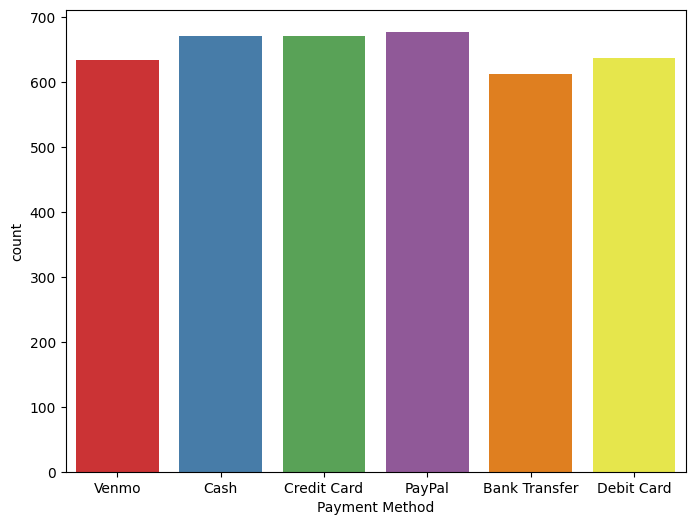

In [161]:
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df,
    x='Payment Method',
    palette='Set1'
)




1.   Credit Card is the most popular payment method, closely followed by PayPal and Venmo; Cash and Bank Transfer are the least used.
2.   Fairly even distribution across payment methods — no extreme preference for any single option



### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

Text(0, 0.5, 'Number of Purchases')

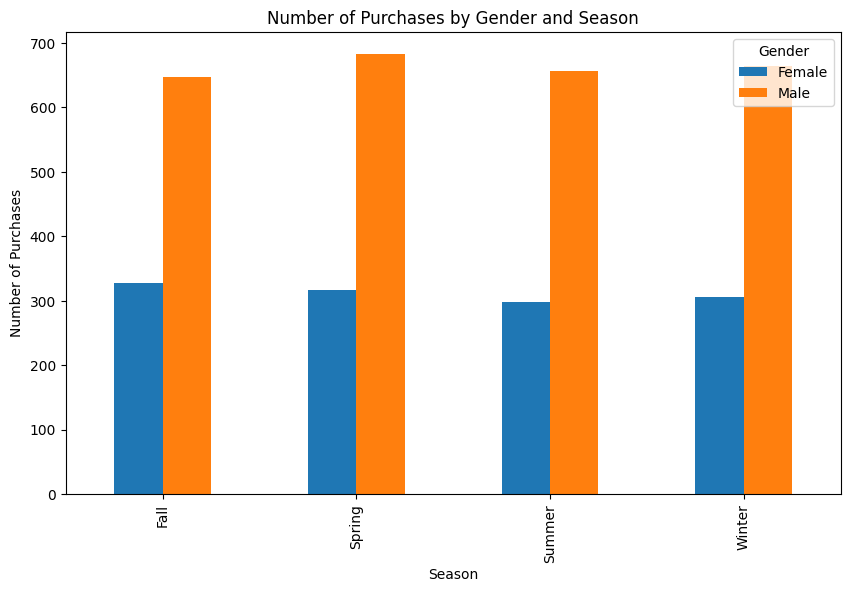

In [162]:
pivot = df.pivot_table(index='Season',
                       columns='Gender',
                       aggfunc='size',
                       fill_value=0)

pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Purchases by Gender and Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')

Text(0.5, 1.0, 'Stacked Count of Purchases by Gender and Season ')

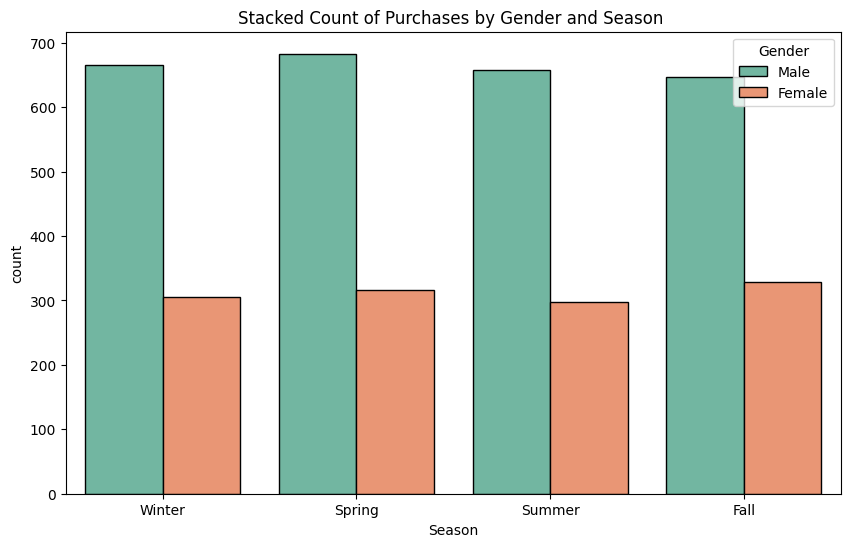

In [163]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df,
              x='Season',
              hue='Gender',
              palette='Set2',
              edgecolor='black')



plt.title('Stacked Count of Purchases by Gender and Season ')


###Males purchase ~2× more than females in every season.
###Spring is the strongest season for total purchases.
###The male–female difference is stable across all seasons.




### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

<Axes: >

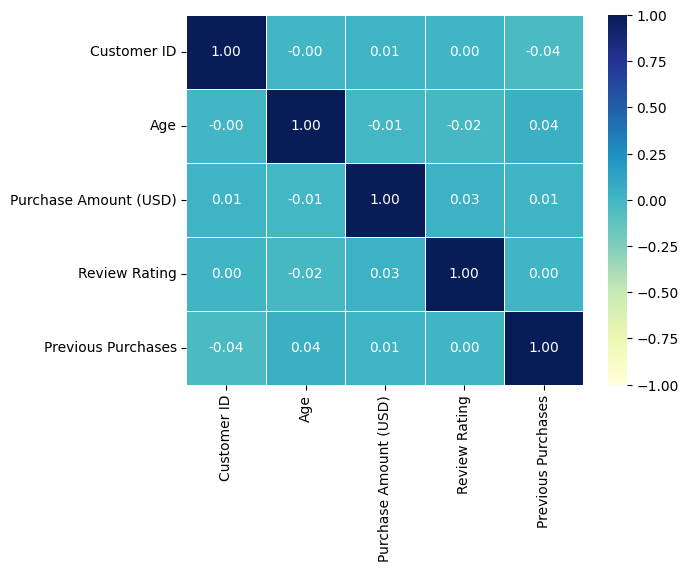

In [164]:
numeric_cols = df.select_dtypes(include='number').columns
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,
    cmap='YlGnBu',
    fmt='.2f',
    linewidths=0.5,
    vmin=-1, vmax=1)


###The correlation between Previous Purchases, Purchase Amount, and Review
 ### Rating is very weak or almost nonexistent (values ​​close to 0 in the heatmap)


### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

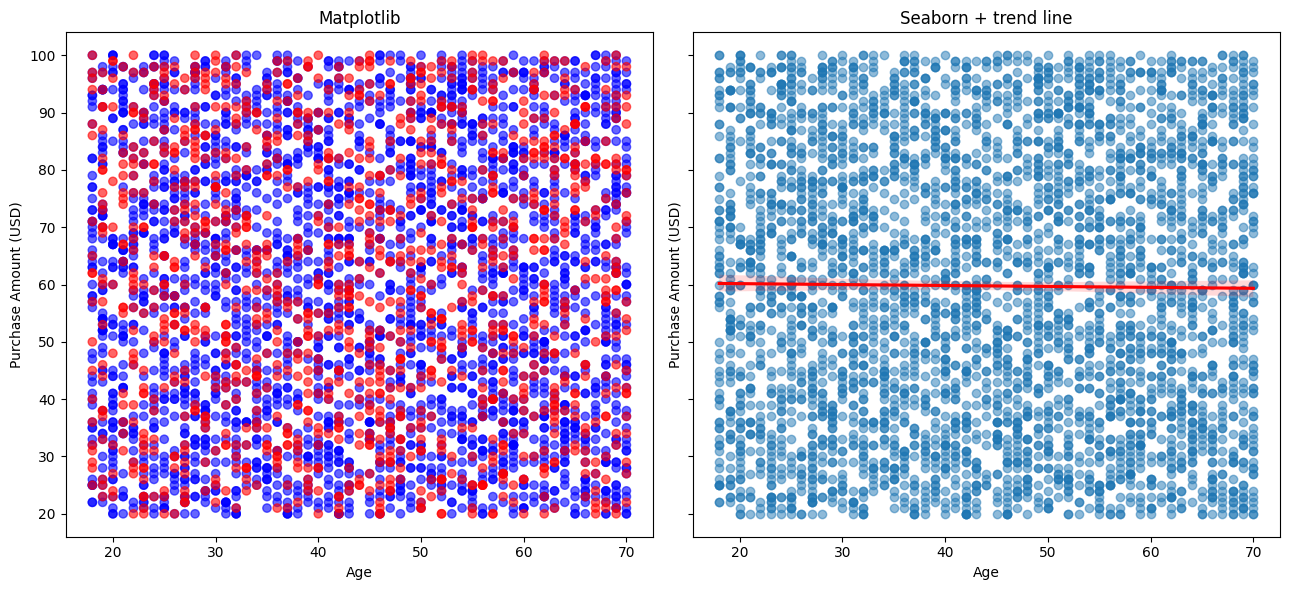

In [165]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

# Matplotlib
ax1.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['Gender'].map({'Male':'blue', 'Female':'red'}), alpha=0.6)
ax1.set_title('Matplotlib')
ax1.set_xlabel('Age')
ax1.set_ylabel('Purchase Amount (USD)')

# Seaborn + trend
sns.regplot(ax=ax2, data=df, x='Age', y='Purchase Amount (USD)', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
ax2.set_title('Seaborn + trend line')
ax2.set_xlabel('Age')

plt.tight_layout()
plt.show()

###Graphene shows a very weak relationship between age and purchase amount.

###The trend lines in Seaborn are mostly horizontal, meaning that age is not a major factor in determining spending.

###Males tend to have more points in the slightly higher ranges (larger amounts), while females are concentrated in the relatively low to mid-range.



### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

In [166]:
pivot = df.pivot_table(
    values='Review Rating',
    index='Category',
    columns='Size',
    aggfunc='mean'
)

pivot

Size,L,M,S,XL
Category,,,,
Accessories,3.736808,3.766192,3.785652,3.819858
Clothing,3.747193,3.692159,3.762676,3.729897
Footwear,3.797093,3.711236,3.865591,3.986567
Outerwear,3.751613,3.693243,3.858929,3.792593


<Axes: xlabel='Size', ylabel='Category'>

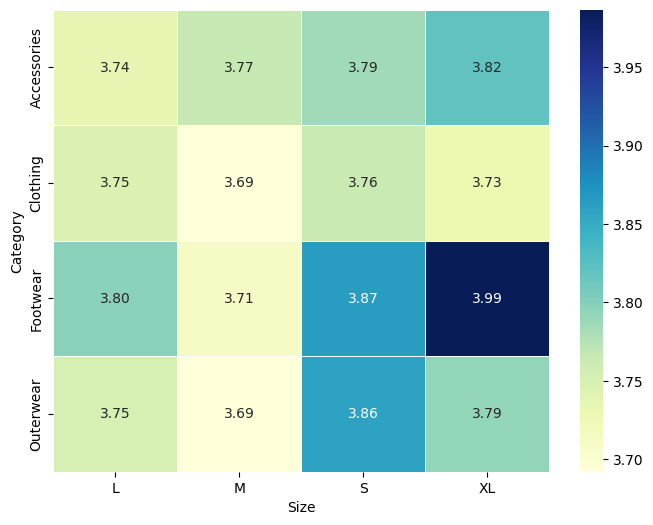

In [167]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5
)

##Average customer ratings were high across all categories and sizes (between 3.69 and 3.99), with the Footwear category and size XL showing the highest ratings in most cases. The lowest relative ratings were seen in size M for both the Clothing and Outerwear categories.

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

Text(0.5, 0, 'Season')

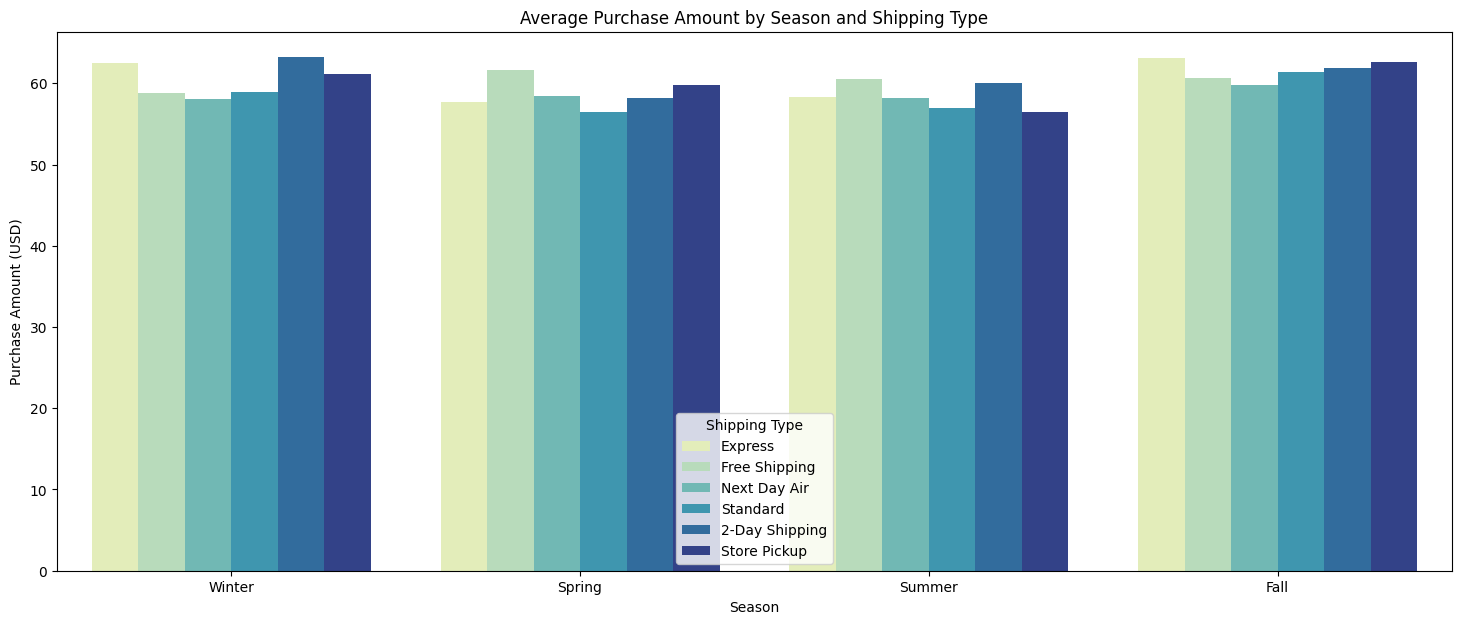

In [168]:
plt.figure(figsize=(18, 7))

sns.barplot(
    data=df,
    x='Season',
    y='Purchase Amount (USD)',
    hue='Shipping Type',
    palette='YlGnBu',
    errorbar=None,
    width=0.8                       # عرض الأعمدة أقل شوية عشان ما تتداخلش
)
plt.title('Average Purchase Amount by Season and Shipping Type')
plt.xlabel('Season')

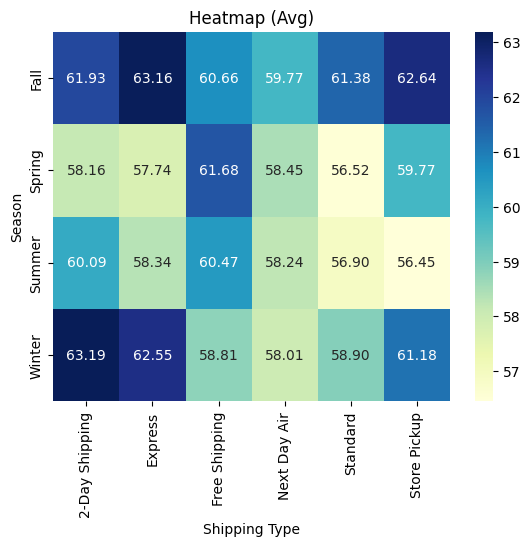

In [169]:
sns.heatmap(df.pivot_table('Purchase Amount (USD)', 'Season', 'Shipping Type', 'mean'), annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Heatmap (Avg)')
plt.show()

###The highest average purchase amount overall appears in winter with Express (63.19) and 2-Day Shipping (62.55).

###In winter, customers who choose express shipping (Express or 2-Day) pay more than others.

###Winter is generally the highest-spending season, while Summer is the lowest.


### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

Text(0, 0.5, 'Review Rating')

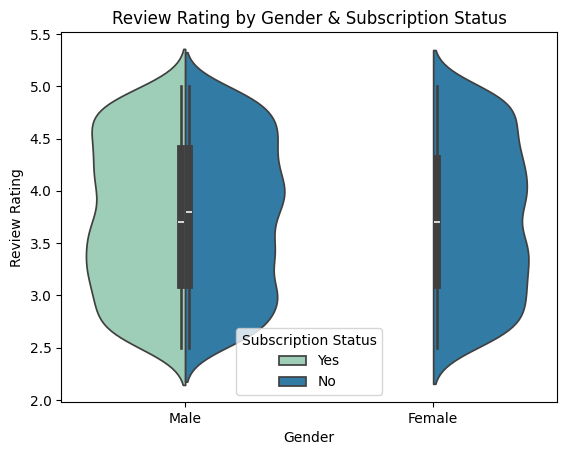

In [170]:
sns.violinplot(
    data=df,
    x='Gender',
    y='Review Rating',
    hue='Subscription Status',
    split=True,
    palette='YlGnBu'
)
plt.title('Review Rating by Gender & Subscription Status')
plt.xlabel('Gender')
plt.ylabel('Review Rating')

###Review Rating distribution is very even between genders and relatively independent of subscription status (Yes/No).

###The median is close to 3.8–4.0 across all groups, with no significant difference or clear trend.


### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

In [171]:
top_items = (
    df.groupby('Item Purchased')['Purchase Amount (USD)']
      .sum()
      .nlargest(5)
      .sort_values(ascending=False)
)

print(" top 5 most purchased Item Purchased by total Purchase Amount")
print(top_items)

 top 5 most purchased Item Purchased by total Purchase Amount
Item Purchased
Blouse     10410
Shirt      10332
Dress      10320
Pants      10090
Jewelry    10010
Name: Purchase Amount (USD), dtype: int64


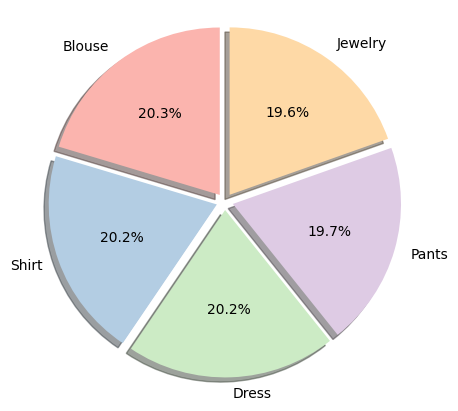

In [172]:
plt.figure(figsize=(5, 5))

plt.pie(
    top_items,
    labels=top_items.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1(range(len(top_items))),
    shadow=True,
    explode=[0.05]*5
)

plt.axis('equal')
plt.show()

Text(0, 0.5, 'Total Purchase Amount (USD)')

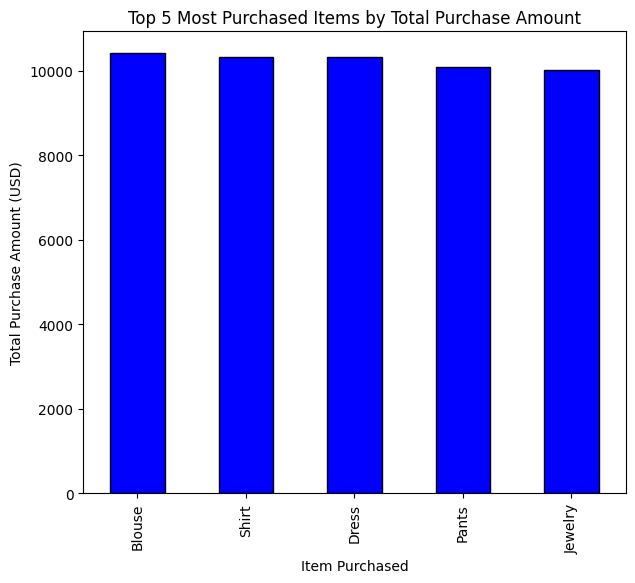

In [173]:
plt.figure(figsize=(7, 6))

top_items.plot(
    kind='bar',
    color='blue',
    edgecolor='black'
)
plt.title('Top 5 Most Purchased Items by Total Purchase Amount')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')




##The top 5 products in terms of total amount spent are Blouse, Shirt, Dress, Pants, and Jewelry, all very close together (around 20% each of the total), with the Clothing category clearly dominating revenue.

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

         Location  Avg Purchase Amount  Avg Previous Purchases
1          Alaska            67.597222               28.097222
37   Pennsylvania            66.567568               27.418919
2         Arizona            66.553846               28.369231
47  West Virginia            63.876543               23.555556
27         Nevada            63.379310               26.034483


Text(0.5, 1.0, 'Top 5 Locations by Average Purchase Amount')

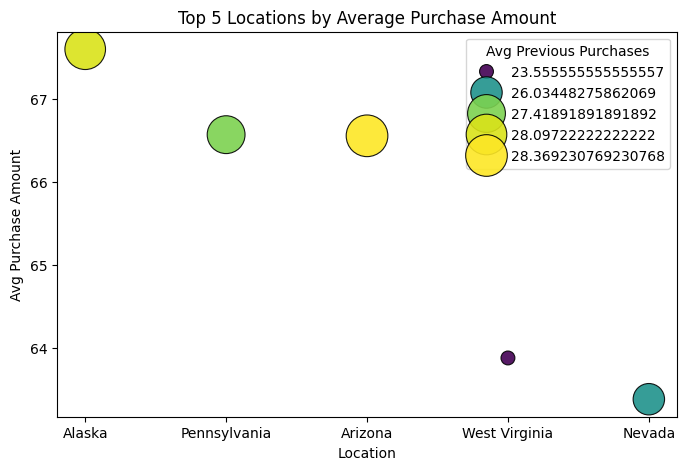

In [174]:

location_stats = (
    df.groupby('Location')
      .agg({
          'Purchase Amount (USD)': 'mean',
          'Previous Purchases': 'mean'
      })
      .rename(columns={
          'Purchase Amount (USD)': 'Avg Purchase Amount',
          'Previous Purchases': 'Avg Previous Purchases'
      })
      .reset_index()
)

top5_locations = location_stats.nlargest(5, 'Avg Purchase Amount')


print(top5_locations[['Location', 'Avg Purchase Amount', 'Avg Previous Purchases']])

plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=top5_locations,
    x='Location',
    y='Avg Purchase Amount',
    size='Avg Previous Purchases',
    sizes=(100, 900),
    hue='Avg Previous Purchases',
    palette='viridis',
    alpha=0.9,
    edgecolor='black',
    linewidth=0.8
)

plt.title('Top 5 Locations by Average Purchase Amount')


###The highest average purchase amount is in Alaska. Average purchase ≈ $67.6
###There is no clear relationship between the average amount spent and the number of previous purchases (the point values ​​are relatively similar), suggesting that the high spending in these states may be related to factors other than purchase frequency.




### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

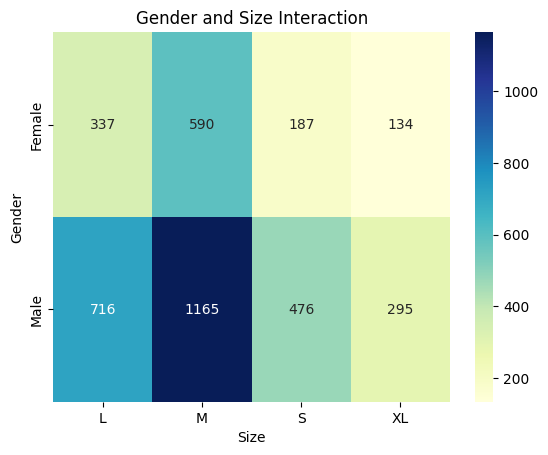

In [175]:
sns.heatmap(
    pd.crosstab(df['Gender'], df['Size']),
    annot=True,
    fmt='d',
    cmap='YlGnBu'
)
plt.title('Gender and Size Interaction')
plt.show()


###Size M is the most common size for both males and females.

###It's quite clear that M is the undisputed winner.

###Males outnumber females in all sizes.

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

In [176]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Promo Code Usage by Frequency of Purchases (Stacked Bar Chart)')

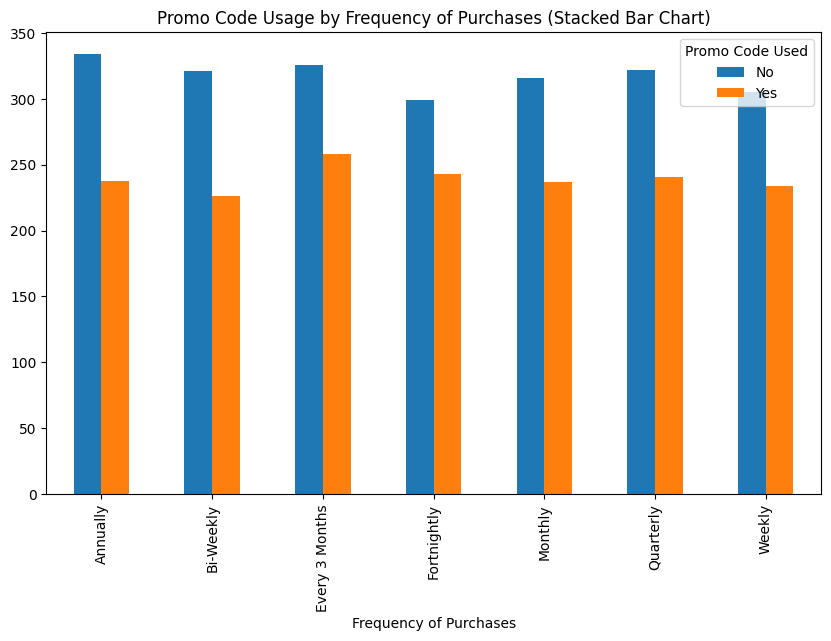

In [177]:
promo_pivot = df.pivot_table(index='Frequency of Purchases', columns='Promo Code Used', aggfunc='size', fill_value=0)

promo_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Promo Code Usage by Frequency of Purchases (Stacked Bar Chart)')


Text(0.5, 1.0, 'Promo Code Usage by Frequency of Purchases (Seaborn Countplot)')

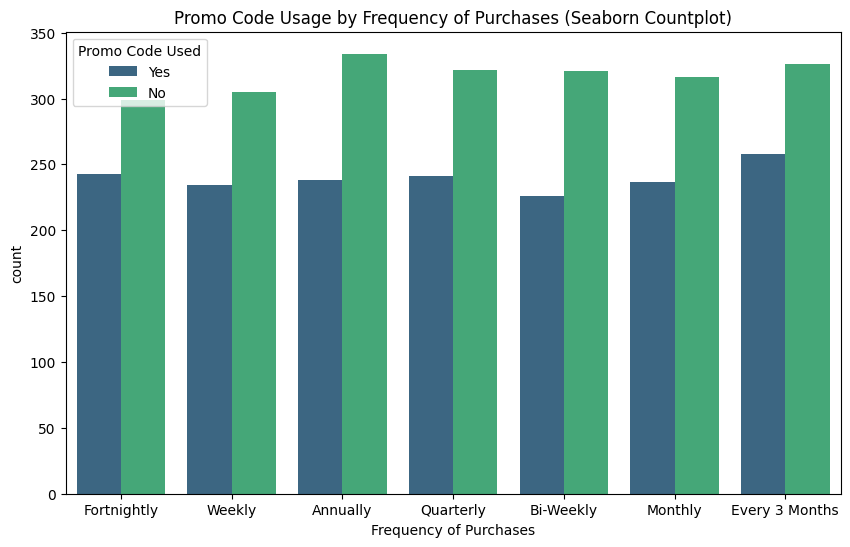

In [178]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Frequency of Purchases', hue='Promo Code Used', palette='viridis')
plt.title('Promo Code Usage by Frequency of Purchases (Seaborn Countplot)')

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

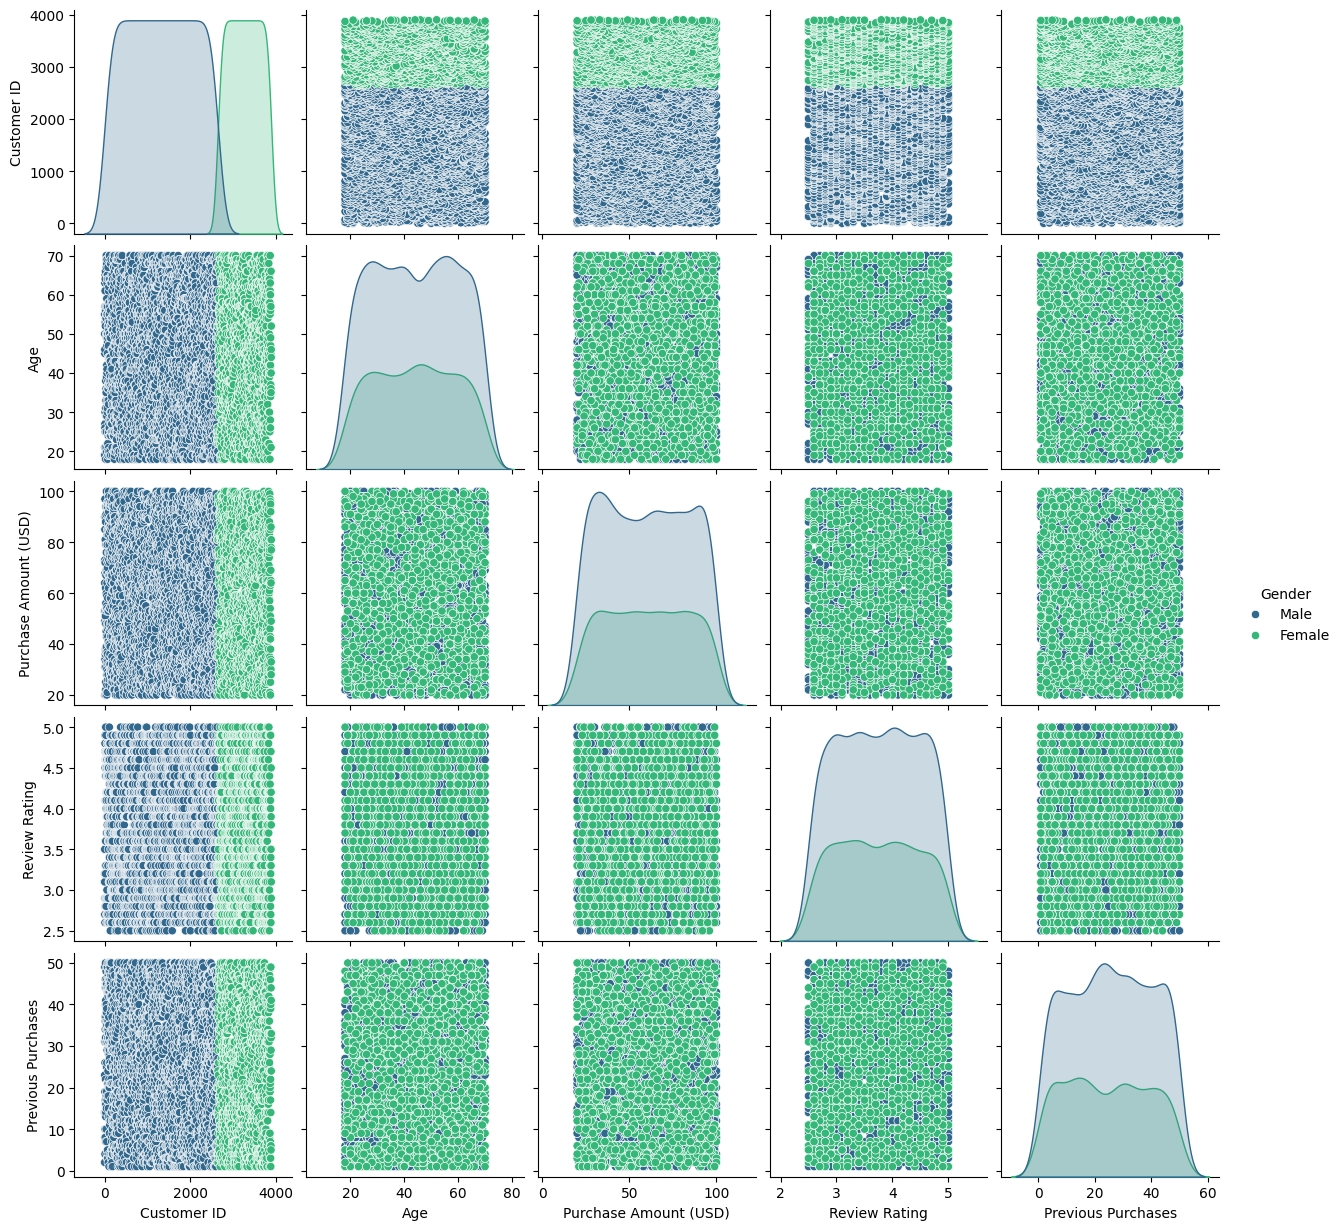

In [179]:
sns.pairplot(df, hue='Gender', palette='viridis')
